# Compare Embeddings

Notebook to compare different embedding methods against MTurk labels to see what corresponds most with human judgements of semantic similarity

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

import src.corpus
import src.semantic_embedding

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Parse the corpus

In [2]:
BNC_FILE = "../data/bnc/bnc.pkl"
corpus = src.corpus.POSCorpus.create_from_bnc_pickled(data_file_path=BNC_FILE)

In [3]:
annotation_df = pd.read_csv('../data/annotations/myself_plus_mturk.csv')
relevant_lemmas = annotation_df.lemma.tolist()
annotation_df.head()

,lemma,noun_count,verb_count,majority_tag,human_score1,human_score2,human_score3,human_score4,human_score5,mean_score
0,aim,137,98,NOUN,2,2,2,2,2,2.0
1,answer,480,335,NOUN,2,2,2,2,2,2.0
2,attempt,302,214,NOUN,2,2,2,2,2,2.0
3,care,403,249,NOUN,2,2,2,2,2,2.0
4,control,519,179,NOUN,2,2,2,2,2,2.0


## Run ELMo, but not the whole thing

In [4]:
sentences_with_relevant_lemmas = []
for sentence in corpus.sentences:
  for tok in sentence:
    if tok['lemma'] in relevant_lemmas:
      sentences_with_relevant_lemmas.append(sentence)
      break

In [5]:
embedder = src.semantic_embedding.SemanticEmbedding(sentences_with_relevant_lemmas)

100%|██████████| 1189/1189 [04:06<00:00,  7.84it/s]


## Run NV similarity

In [7]:
annotation_df['nv_cosine_similarity'] = \
  annotation_df.apply(lambda row: embedder.get_elmo_nv_similarity(row.lemma), axis=1)

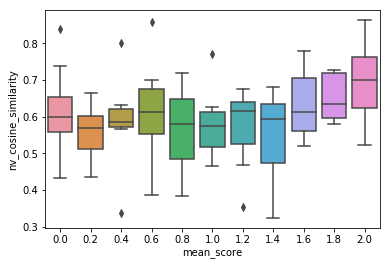

In [8]:
sns.boxplot(annotation_df.mean_score, annotation_df.nv_cosine_similarity)

In [9]:
scipy.stats.spearmanr(annotation_df.mean_score, annotation_df.nv_cosine_similarity)

SpearmanrResult(correlation=0.3999243419412927, pvalue=1.1757210001665669e-06)